## Project Phase II

### Team Members:
- Neel Mallik
- Joshua Herren
- Kunal Lotun
- Kyle Hong


## Part 1: 

### Problem Motivation

Video games are becoming more and more popular by the day, with releases become instant hits and others slowly rising in popularity as it gains an audience. For games that become popular right off the bat, how do they retain their popularity? Is it because of their genre? Their length? There are many factors to a game's success, but there are even more related to how a game maintains its popularity, as that is a much harder struggle than the initial popularity of the game. Now, there are plenty of outliers to this. For example, games like Madden NFL, NBA 2K, FC, have a cult following due to their respective sports that massively contributes to their popularity. On the other hand, there are plenty of games that are completely imagined that have nothing to do with real life yet still have a massive, dedicated following for years. Think games like Overwatch, with no semblance to reality yet still massively popular. This is what I aim to figure out. The key questions are as follows: 

1. Are there any particular markers or trends that go towards a game being popular? 
2. Say a game is popular on release, are there any marker or trends showing this game retaining its popularity? 
3. How do such markers or trends change when differing certain charecteristics of the game?
4. How can we predict, overall, if a game will start off popular and retain its popularity? On the same line, are there any markers or trends that are consistent with how long a game retains its popularity? If so, how can we use these markers to guage similar games and their popularity retention scores?

## Summary of the Data Processing Pipeline

1. Web scrape the API to get the raw data
2. Clean the data for analysis and visualization
3. Format the cleaned data, this will be done via plotting in order to get a clean visualization of the data 

## Part 2: 

### Below is what I did to get my raw data, just want for anybody to be able to run it now (in this group) so you can see what my data is and how we want to change/alter how we collect the data, if anybody has a better idea/api. 

In [1]:
# imports
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Site
url = "https://api.rawg.io/api/games"
# API key used to pull data
key = "07dfd979a676418e813cbba97a9dfe4f"
pages = 5
# (1) we'll need something like this since this API limits to the first page in a single get request

# Dictionary of parameters that is sent to the url in a get (r)
params = {
    "key": key,
    "dates": "2024-01-01,2025-12-31",  # filter by date released
    "ordering": "-added",  # sort by added (so we don't get random games with no adds)
    "page": pages
}

# send the get, get the json response, which we can't use directly, so convert it to a dictionary
data = requests.get(url, params=params).json()

# create empty list, we will store all of our data here
games = []
for pages in range(1, pages + 1): #Iterates through each page
    params = {
        "key": key,
        "dates": "2024-01-01,2025-12-31",  # filter by date released
        "ordering": "-added",  # sort by added (so we don't get random games with no adds)
        "page": pages #the current page
    }

    # send the get, get the json response, which we can't use directly, so convert it to a dictionary
    data = requests.get(url, params=params).json()

    for game in data.get("results", []):
        temp = game.get('added_by_status')
        games.append({  # append column with corresponding data (via get("{name of column needed}"))
            "name": game.get("name"),
            # for example, we create the column "name" with data from game (the specific game in "results", which is the actual data from the API, which is, in this case, the name of the game)
            "released": game.get("released"),
            "rating (out of 5.0)": game.get("rating"),
            "ratings_count": game.get("ratings_count"),
            "length (h)": game.get("playtime"),
            "added": game.get("added"),
            #"added_by_status": game.get("added_by_status"),
            "yet to be downloaded": temp.get('yet', 0),
            "owned": temp.get('owned', 0),
            "beaten": temp.get('beaten', 0),
            "have not played yet": temp.get('toplay', 0),
            "dropped": temp.get('dropped', 0),
            "currently playing": temp.get('playing', 0),
            "genres": [genre["name"] for genre in game.get("genres", [])]
            # in this line, we create the column "genres". this is a list of genres (as strings) so we iterate through the list and add    each one to the dataset

        })
# (2) we'll need to create another loop here that iterates however many times "pages" is set to, making sure to create a get request every time it iterates through a single page

# iterate through this until we reach each game
# convert to dataframe, i know this wasn't necessary but it just looked better this way similar to the spotify example
df = pd.DataFrame(games)
# display as a table rather than just text
display(df)

,name,released,rating (out of 5.0),ratings_count,length (h),added,yet to be downloaded,owned,beaten,have not played yet,dropped,currently playing,genres
0,Satisfactory,2024-09-11,4.29,333,12,2888,98,2222,102,146,207,113,"[Indie, Strategy, Adventure, Action]"
1,Vampire: The Masquerade – Bloodlines 2,2025-10-21,3.92,315,329,2404,286,683,16,1372,12,35,"[Action, RPG]"
2,S.T.A.L.K.E.R. 2: Heart of Chornobyl,2024-11-20,3.77,292,7,2140,336,534,104,1063,61,42,"[Shooter, Adventure, Action, RPG]"
3,V Rising,2024-05-08,3.73,167,7,2066,89,1587,69,142,147,32,"[Massively Multiplayer, Adventure, Action]"
4,Hollow Knight: Silksong,2025-09-04,4.26,160,13,1412,166,262,69,820,26,69,"[Indie, Platformer, Adventure, Action]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Rise of the Ronin,2024-03-22,3.31,28,1,255,38,53,22,120,17,5,"[Adventure, Action, RPG]"
96,Granblue Fantasy: Relink,2024-02-01,3.34,29,0,254,33,47,26,136,8,4,"[Adventure, Action, RPG]"
97,Still Wakes the Deep,2024-06-18,3.89,82,6,253,20,45,98,67,19,4,"[Adventure, Action]"
98,MetaMorph,2025-03-04,0.00,4,1,249,6,239,1,3,0,0,"[Adventure, Action, RPG, Casual, Strategy, Sim..."


In [3]:
# cleaning dataset function
def clean_data(df): 
    """
    Cleans the dataframe by doing the following:
        - Converting times to DateTime
        - Dropping duplicate games
        - Removing invalid rows
        - Showing current player ratio 
        - Turning genres into a string 
        - Adding a popularity score, rentention ratio, and engagement col
        - Removing games that do not meet rating count
        - Adds a Game Number
    
    Args: 
        df (pd.DataFrame) : a data frame to clean

    Returns:
        df (pd.DataFrame) : cleaned data frame
    """

    df = df.drop_duplicates(subset=['name']) # Remove Duplicates
    df = df.dropna(subset=['name', 'rating (out of 5.0)', 'ratings_count', 'added']) # Remove NA rows (rows without names, ratings, rating count, added or not)
    df['released'] = pd.to_datetime(df['released'], errors='coerce') # Converts released to datetime 

    # CLEANING GENRES INTO DUMMY BOOL COLUMNS | https://pandas.pydata.org/docs/reference/api/pandas.Series.str.get_dummies.html | Completely forgot how to use this but I used this StackOverflow article: https://stackoverflow.com/questions/18889588/create-dummies-from-column-with-multiple-values-in-pandas
    genre_dummies = df['genres'].str.join(', ').str.get_dummies(sep=', ').astype(bool) # create boolean columns for each unique genre found in the dataset, separated by ','. For example, "(RPG, Strategy,..)"
    df = df.drop('genres', axis=1).join(genre_dummies) # remove the original genres column and add the new boolean genre columns
    # must clear output and remake the original data (execute above cell) then run this one in order to rerun

    df['active rate'] = (df['currently playing'] / (df['owned'] + 1)).round(3) # Adds the current player ratio
    df['popularity score'] = (df['added'] + df['owned'] + df['currently playing']).round(3) # Adds a pop score, calculated by adding the amount added, owned, and currently playing
    df['retention ratio'] = ((df['currently playing'] + df['beaten']) / (df['dropped'] + 1)).round(3) # Adds a retention score, how well people who bought the game are still playing it
    df['engagement'] = ((df['currently playing'] + df['beaten']) / (df['added'] + 1)).round(3) # Fraction of interested users who actually played or completed the game
    df = df[df['ratings_count'] > 10] # Remove games that have less than 10 ratings
    df.index.name = "Game Number"
    
    return df 

df = clean_data(df)
display(df)

,name,released,rating (out of 5.0),ratings_count,length (h),added,yet to be downloaded,owned,beaten,have not played yet,...,RPG,Racing,Shooter,Simulation,Sports,Strategy,active rate,popularity score,retention ratio,engagement
Game Number,,,,,,,,,,,,,,,,,,,,,
0,Satisfactory,2024-09-11,4.29,333,12,2888,98,2222,102,146,...,False,False,False,False,False,True,0.051,5223,1.034,0.074
1,Vampire: The Masquerade – Bloodlines 2,2025-10-21,3.92,315,329,2404,286,683,16,1372,...,True,False,False,False,False,False,0.051,3122,3.923,0.021
2,S.T.A.L.K.E.R. 2: Heart of Chornobyl,2024-11-20,3.77,292,7,2140,336,534,104,1063,...,True,False,True,False,False,False,0.079,2716,2.355,0.068
3,V Rising,2024-05-08,3.73,167,7,2066,89,1587,69,142,...,False,False,False,False,False,False,0.020,3685,0.682,0.049
4,Hollow Knight: Silksong,2025-09-04,4.26,160,13,1412,166,262,69,820,...,False,False,False,False,False,False,0.262,1743,5.111,0.098
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,ANOMALOUS COFFEE MACHINE,2024-08-11,4.13,92,5,261,19,164,3,46,...,False,False,False,True,False,False,0.152,450,5.600,0.107
95,Rise of the Ronin,2024-03-22,3.31,28,1,255,38,53,22,120,...,True,False,False,False,False,False,0.093,313,1.500,0.105
96,Granblue Fantasy: Relink,2024-02-01,3.34,29,0,254,33,47,26,136,...,True,False,False,False,False,False,0.083,305,3.333,0.118


## Part 3:

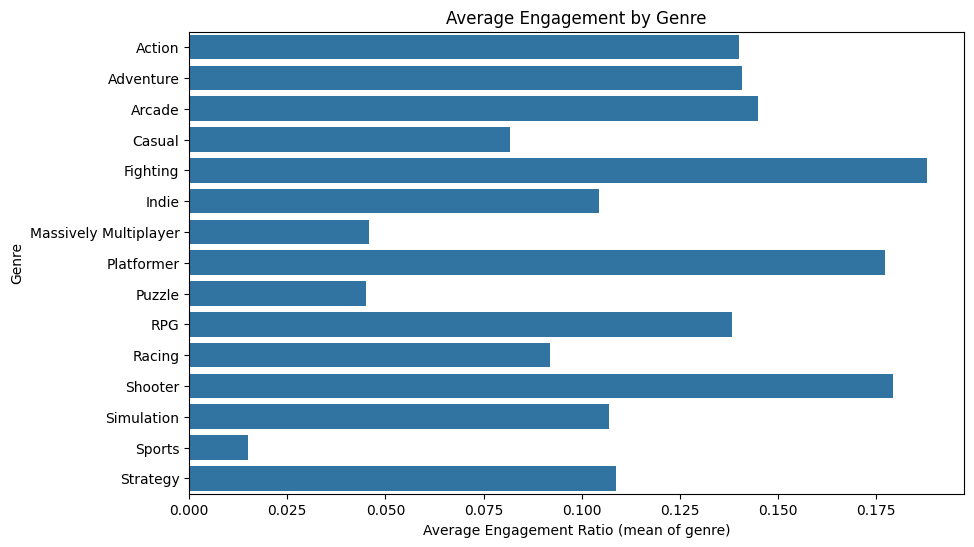

In [4]:
genre_cols = [col for col in df.columns if col not in [ # ALL GENRE COLUMNS, REMOVE EVERYTHING ELSE 
    'name', 'released', 'rating (out of 5.0)', 'ratings_count', 'length (h)',
    'added', 'yet to be downloaded', 'owned', 'beaten', 'have not played yet',
    'dropped', 'currently playing', 'genres', 'active rate',
    'popularity score', 'retention ratio', 'engagement'
]]

engagement_per_genre = {}

for genre in genre_cols:
    genre_games = df[df[genre]] 
    engagement_per_genre[genre] = genre_games['engagement'].mean() # average out the engagement of each genre, then compare via bar

plt.figure(figsize=(10,6))
sns.barplot(x= list(engagement_per_genre.values()), y=list(engagement_per_genre.keys())) # easier to see results when it's turned like this
plt.title("Average Engagement by Genre")
plt.xlabel("Average Engagement Ratio (mean of genre)")
plt.ylabel("Genre")
plt.show()

This graph shows that games that have certain categories clearly have a higher average engagement ratio than other games of different categories. This helps answer question 1 and question 3. Engagement levels clearly change depending on the genre, therefore showing that trends clearly change depending on the characteristic (genre in this case).

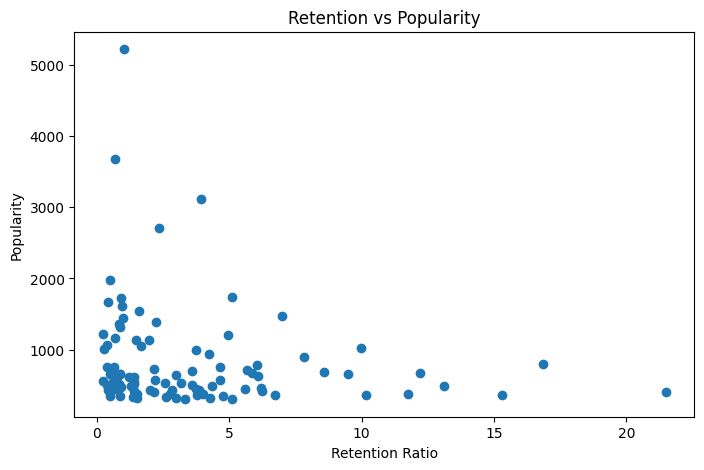

In [5]:
plt.figure(figsize=(8,5))
plt.scatter(df['retention ratio'], 
            df['popularity score'])

plt.title("Retention vs Popularity")
plt.xlabel("Retention Ratio")
plt.ylabel("Popularity")
plt.show()

This graph shows that just because a game has a high retention ratio does not necessarily mean it has a high popularity score. Also, just because a game starts off popular, doesn't mean that the game will stay like that. This answers our second question. Since many of our relatively high (y-axis) dots (games) are on the low side of the graph (x-axis) means that these games start off high and don't have as many people who have finished the game or are playing it. Therefore showing that the games have a lower retention rate even after starting high. 

The graphs show that while both engagement and retention vary upon each game, and although a game starts off hot, it may not finish that way, these are not the only factors in a game's popularity. Since we can clearly see the results of the last graph, it is safe to say there are other factors at play, such as brand popularity, hype, and more. We cannot realistically predict necessarily how a game retains its popularity, since not all games are created equally, there are no guaranteed characteristics to guage games with each other by, therefore we cannot make an accurate conclusion. But we can use our first graph to show that certain game genres do have an edge over others. For example, sports games have a lower chance of being popular than a shooting game, for example.